# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

<font color='#FF3620'>Для того, чтобы результаты после перезапусков не отличались</font>

# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [2]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [3]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [4]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6994,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0
6996,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.3 kmpl,1248 CC,73.9 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


In [5]:
# можно еще так:
# df_train.head(5)
# df_train.tail(5)

(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [6]:
df_train.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [7]:
df_test.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [8]:
df_train.isna().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
torque            True
seats             True
dtype: bool

In [9]:
df_test.isna().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
torque            True
seats             True
dtype: bool

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [10]:
df_train.drop(columns=['selling_price']).duplicated().value_counts()[1]

1159

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [11]:
df_train[df_train.drop(columns=['selling_price']).duplicated()]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [12]:
df_train = (
    df_train.iloc[df_train.drop(columns=['selling_price']).drop_duplicates(keep='first').index]
)

In [13]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [14]:
df_train.reset_index(drop=True)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [15]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [16]:
def check_units(column: pd.Series) -> set:
    units = column.apply(lambda x: x.split()[1] if type(x) is str and len(x.split()) > 1 else x)
    return set(units.unique())

In [17]:
print(*check_units(df_train['mileage']).union(check_units(df_test['mileage'])), sep='\n')

nan
kmpl
km/kg


In [18]:
print(*check_units(df_train['engine']).union(check_units(df_test['engine'])), sep='\n')

nan
CC


In [19]:
print(*check_units(df_train['max_power']).union(check_units(df_test['max_power'])), sep='\n')

nan
bhp
 bhp
0


In [20]:
df_train[df_train['max_power'] == ' bhp']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
4217,Maruti Omni CNG,2000,80000,100000,CNG,Individual,Manual,Second Owner,10.9 km/kg,796 CC,bhp,NaN,8.0


In [21]:
df_train[df_train['max_power'] == '0']

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
503,Maruti Alto K10 LXI,2011,204999,97500,Petrol,Individual,Manual,First Owner,NaN,NaN,0,NaN,NaN
1238,Maruti Swift Dzire VDI Optional,2017,589000,41232,Diesel,Dealer,Manual,First Owner,NaN,NaN,0,NaN,NaN
2196,Tata Indica Vista Quadrajet LS,2012,240000,70000,Diesel,Individual,Manual,First Owner,NaN,NaN,0,NaN,NaN


In [22]:
def remove_units_from_mileage(measurement: object) -> float:
    if type(measurement) == str:
        measurement_splitted: list[str] = measurement.split()
        if len(measurement_splitted) > 1:
            value: float = float(measurement_splitted[0])
            units: str = measurement_splitted[1]
            if units == 'km/kg':
                return value * 1.40
            return value
    return measurement

In [23]:
df_train['mileage'] = df_train['mileage'].apply(remove_units_from_mileage)
df_test['mileage'] = df_test['mileage'].apply(remove_units_from_mileage)

/var/folders/dx/fgh6ldbs7jv4brn4__lq8b440000gn/T/ipykernel_37106/2716277486.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['mileage'] = df_train['mileage'].apply(remove_units_from_mileage)


In [24]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [25]:
def remove_units_from_engine(measurement: object) -> float:
    if type(measurement) == str:
        measurement_splitted: list[str] = measurement.split()
        if len(measurement_splitted) > 1:
            return float(measurement_splitted[0])
    return measurement

In [26]:
df_train['engine'] = df_train['engine'].apply(remove_units_from_engine)
df_test['engine'] = df_test['engine'].apply(remove_units_from_engine)

/var/folders/dx/fgh6ldbs7jv4brn4__lq8b440000gn/T/ipykernel_37106/952124176.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['engine'] = df_train['engine'].apply(remove_units_from_engine)


In [27]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power         object
torque            object
seats            float64
dtype: object

In [28]:
def remove_units_from_max_power(measurement: object) -> float:
    if type(measurement) == str:
        measurement_splitted: list[str] = measurement.split()
        if len(measurement_splitted) > 1:
            return float(measurement_splitted[0])
        # to fix ' bhp' case
        if measurement.isnumeric():
            return float(measurement)
        return np.NaN
    return float(measurement)

In [29]:
df_train['max_power'] = df_train['max_power'].apply(remove_units_from_max_power)
df_test['max_power'] = df_test['max_power'].apply(remove_units_from_max_power)

/var/folders/dx/fgh6ldbs7jv4brn4__lq8b440000gn/T/ipykernel_37106/3425134233.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['max_power'] = df_train['max_power'].apply(remove_units_from_max_power)


In [30]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power        float64
torque            object
seats            float64
dtype: object

Код, который парсит torque в две отдельных колонки ниже, но там как-то не очень понятно: где-то вообще нет единиц измерения, где-то в max_torque_rpm интервал, в общем проще дропнуть...

In [31]:
# def remove_units_from_torque(measurement: object) -> set:
#     import re
     
#     def filter_value_and_units_from_string(s: str) -> tuple[float, str]:
#         string_value: str = ''.join(c for c in s if c.isnumeric() or c == '.')
#         units: str = s.replace(string_value, '').strip() 
#         return (float(string_value), units)
            
        
#     if type(measurement) == str:
#         measurement_splitted: list[str] = re.split('at |@|/|\(|\)', measurement)
#         measurement_splitted = [ms for ms in measurement_splitted if ms]
#         if len(measurement_splitted) == 5:
#             torque: float = float(measurement_splitted[0])
#             torque_units: str = measurement_splitted[3]
#             max_torque_rpm: str = '/'.join(
#                 [measurement_splitted[1], measurement_splitted[2]]
#             ).strip()
#         if len(measurement_splitted) == 4:
#             torque: float = float(measurement_splitted[0])
#             torque_units: str = measurement_splitted[2].strip()
#             max_torque_rpm: str = measurement_splitted[1].strip()
#         if len(measurement_splitted) == 3:
#             torque, torque_units = filter_value_and_units_from_string(measurement_splitted[0])
#             if measurement_splitted[1].endswith('+'):
#                 max_torque_rpm: str = '/'.join(
#                     [measurement_splitted[1], measurement_splitted[2]]
#                 )
#             else:
#                 max_torque_rpm: str = measurement_splitted[2]
#             max_torque_rpm = max_torque_rpm.strip().replace('rpm', '')
#         if len(measurement_splitted) == 2:
#             torque, torque_units = filter_value_and_units_from_string(measurement_splitted[0])
#             max_torque_rpm: str = measurement_splitted[1].replace('rpm', '').strip()
#         if len(measurement_splitted) == 1:            
#             torque, torque_units = filter_value_and_units_from_string(measurement_splitted[0])
#             max_torque_rpm: float = np.NaN
        
#         if torque_units.lower() == 'nm':
#             torque *= 0.101972
                
#         return (torque, max_torque_rpm)

In [32]:
# df_train[['torque', 'max_torque_rpm']] = (
#     df_train['torque'].apply(remove_units_from_torque).apply(pd.Series)
# )
# df_test[['torque', 'max_torque_rpm']] = (
#     df_test['torque'].apply(remove_units_from_torque).apply(pd.Series)
# )

In [33]:
df_train = df_train.drop(columns=["torque"])
df_test = df_test.drop(columns=["torque"])

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [34]:
columns_with_nans: list[str] = ['mileage', 'engine', 'max_power', 'seats']
medians = df_train[columns_with_nans].median()
medians

mileage        19.40
engine       1248.00
max_power      81.86
seats           5.00
dtype: float64

In [35]:
df_train[columns_with_nans] = df_train[columns_with_nans].fillna(medians)
df_test[columns_with_nans] = df_test[columns_with_nans].fillna(medians)


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

<font color='#FF3620'>Численное значение seats фактически не несет смысла, в отличие от, например, мощности двигателя. Нельзя однозачно сказать, что дороже и лучше: машина с 2 сиденьями или с 4. Ниже мы это даже увидим</font>

In [36]:
df_train['engine'] = df_train['engine'].astype(int)
df_test['engine'] = df_test['engine'].astype(int)

df_train['seats'] = df_train['seats'].astype(int)
df_test['seats'] = df_test['seats'].astype(int)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

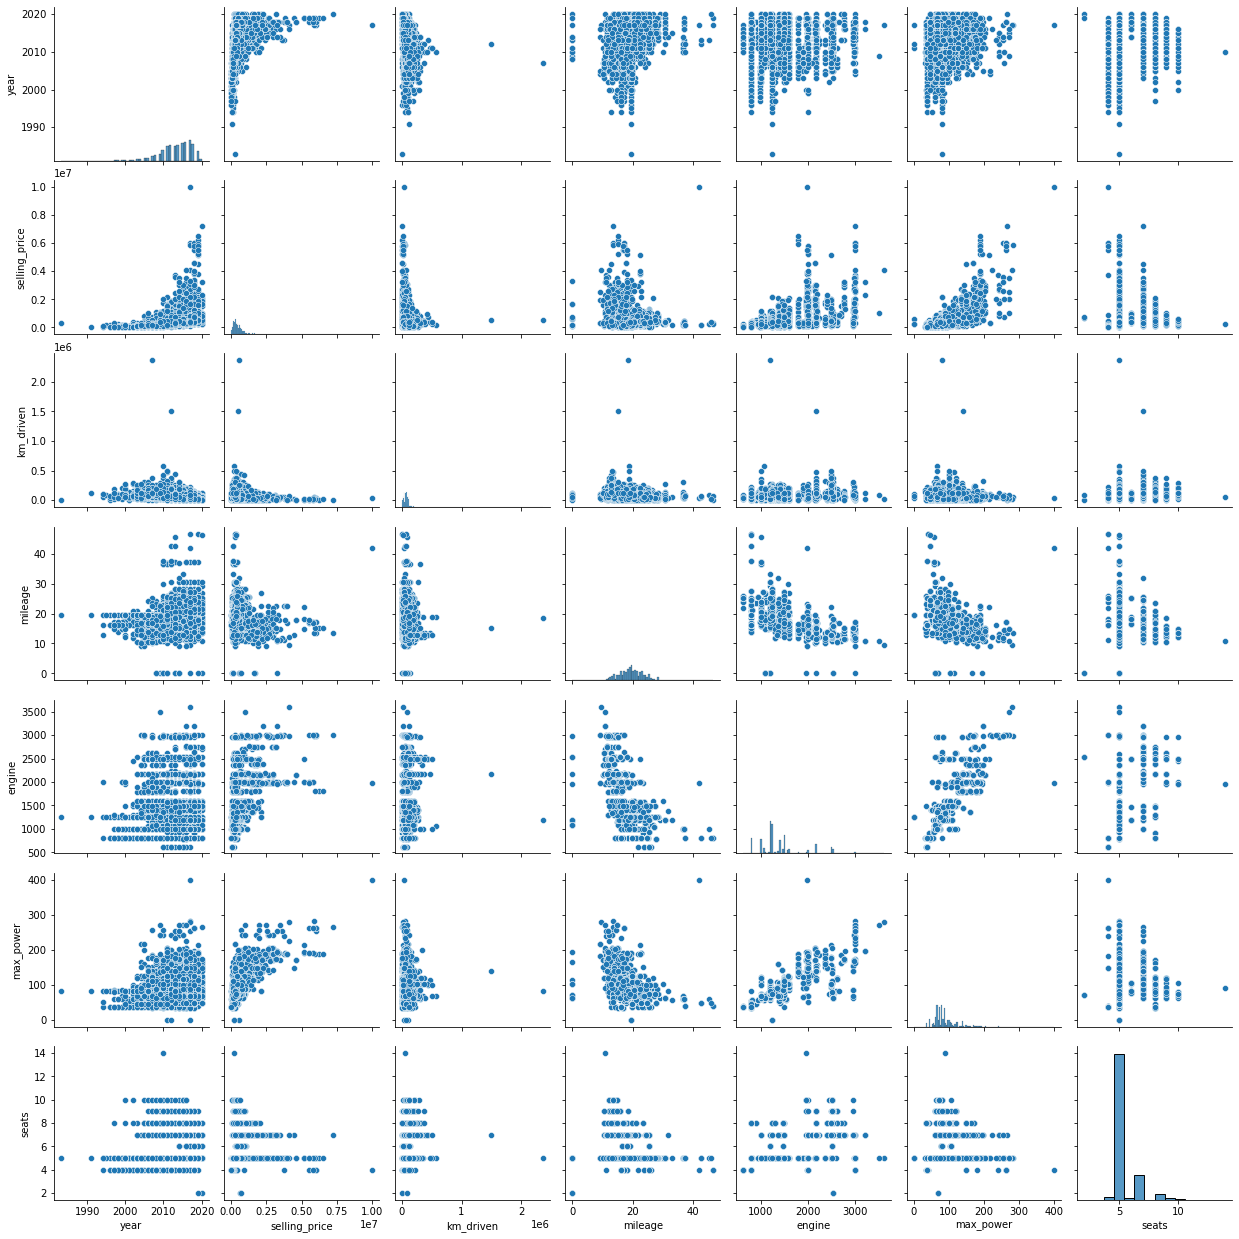

In [37]:
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

In [38]:
df_train.corr()

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.427279,-0.368966,0.322860,0.002819,0.156858,0.041178
selling_price,0.427279,1.000000,-0.164828,-0.111323,0.447672,0.692814,0.149953
km_driven,-0.368966,-0.164828,1.000000,-0.171749,0.229766,0.024588,0.192328
mileage,0.322860,-0.111323,-0.171749,1.000000,-0.561690,-0.376646,-0.436971
engine,0.002819,0.447672,0.229766,-0.561690,1.000000,0.681117,0.652172
max_power,0.156858,0.692814,0.024588,-0.376646,0.681117,1.000000,0.244112
seats,0.041178,0.149953,0.192328,-0.436971,0.652172,0.244112,1.000000


* Больше пробег – меньше цена автомобиля
* Позже год выпуска – выше цена автомобиля
* Больше мощность – выше цена автомобиля
* Больше мощность – больше количество сидений
* Больше пробег – раньше год выпуска

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

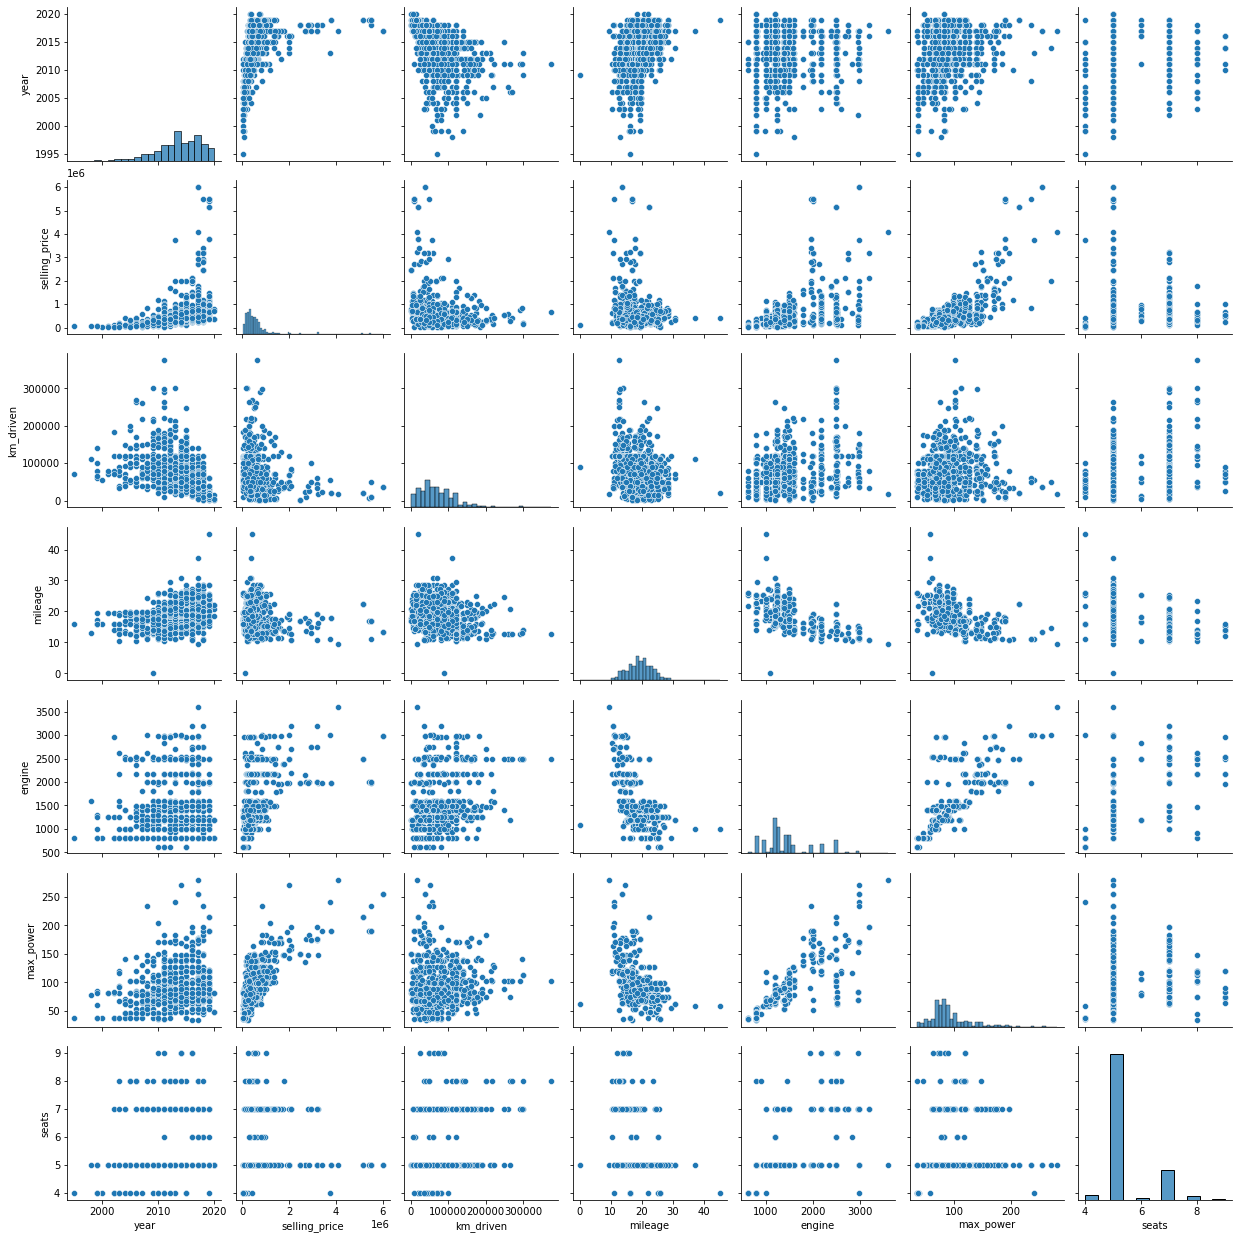

In [39]:
sns.pairplot(df_test)

Визуально совокупности train и test скорее похожи, чем не похожи))

In [40]:
df_test.corr()

,year,selling_price,km_driven,mileage,engine,max_power,seats
year,1.000000,0.416422,-0.469142,0.332003,0.013145,0.229108,0.019283
selling_price,0.416422,1.000000,-0.235824,-0.152439,0.468086,0.750955,0.086948
km_driven,-0.469142,-0.235824,1.000000,-0.249866,0.289379,0.022792,0.286780
mileage,0.332003,-0.152439,-0.249866,1.000000,-0.594620,-0.405939,-0.469676
engine,0.013145,0.468086,0.289379,-0.594620,1.000000,0.726953,0.634820
max_power,0.229108,0.750955,0.022792,-0.405939,0.726953,1.000000,0.262978
seats,0.019283,0.086948,0.286780,-0.469676,0.634820,0.262978,1.000000


(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<AxesSubplot:>

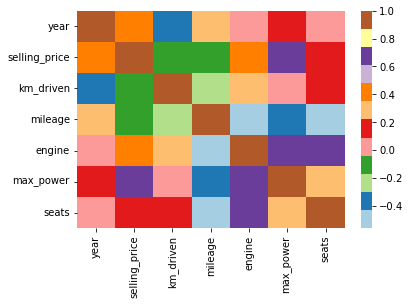

In [41]:
sns.heatmap(df_train.corr(), cmap="Paired")

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
    <br>year и engine 
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?
</font>
    <br> * max_power и selling_price
    <br> * engine и max_power
    <br> * engine и selling_price
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>
<br> Да

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

<AxesSubplot:xlabel='selling_price', ylabel='max_power'>

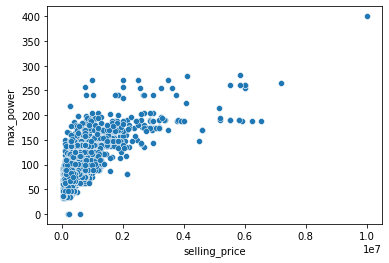

In [42]:
sns.scatterplot(x=df_train['selling_price'], y=df_train['max_power'])

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

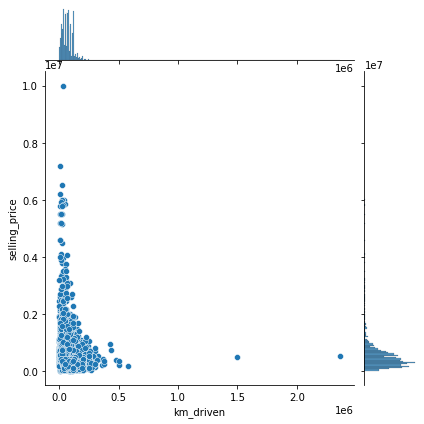

In [43]:
sns.jointplot(x=df_train['km_driven'], y=df_train['selling_price'])

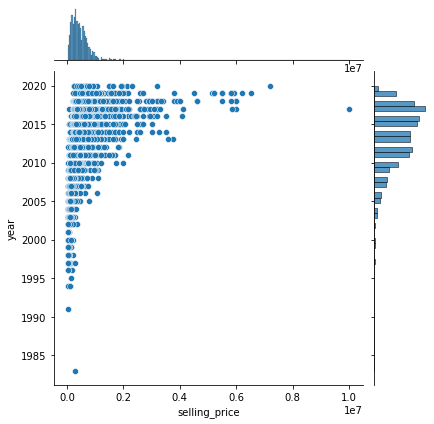

In [44]:
sns.jointplot(x=df_train['selling_price'], y=df_train['year'])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='selling_price', ylabel='Density'>

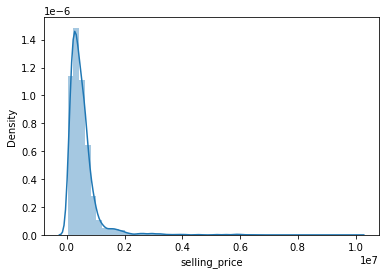

In [45]:
sns.distplot(df_train['selling_price'])

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [46]:
real_columns = ['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

In [47]:
y_train = df_train['selling_price']
X_train = df_train[real_columns]

In [48]:
assert X_train.shape == (5840, 6)

In [49]:
y_test = df_test['selling_price']
X_test = df_test[real_columns]

In [50]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

model: LinearRegression = LinearRegression()

Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [52]:
from sklearn.preprocessing import StandardScaler

scaler: StandardScaler = StandardScaler()
X_train: pd.DataFrame = scaler.fit_transform(X_train, y_train)
X_test: pd.DataFrame = scaler.transform(X_test)

In [53]:
model = model.fit(X_train, y_train)
print(r2_score(y_train, model.predict(X_train)))
print(MSE(y_train, model.predict(X_train)))

0.5923541622424279
116846925573.33908


In [54]:
for feature, score in enumerate(model.coef_):
    print(real_columns[feature], score)

year 153195.22100521871
km_driven -44159.12749116859
mileage 29019.164147076764
engine 60837.78248879516
max_power 323188.9194101077
seats -23422.70462790509


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

max_power

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [55]:
from sklearn.linear_model import Lasso

model: Lasso = Lasso()

<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

Неподходящий коэффициент регуляризации

In [56]:
model = model.fit(X_train, y_train)
print(r2_score(y_train, model.predict(X_train)))
print(MSE(y_train, model.predict(X_train)))

0.5923541622072409
116846925583.42502


In [57]:
for feature, score in enumerate(model.coef_):
    print(real_columns[feature], score)

year 153194.93712021032
km_driven -44158.01875894782
mileage 29017.384107353784
engine 60832.98889127391
max_power 323189.8122002987
seats -23419.77569215906


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [58]:
from sklearn.model_selection import GridSearchCV

grid_search: GridSearchCV = GridSearchCV(
    estimator=Lasso(
        max_iter=int(1e4),
        positive=True,
        tol=1e-3, 
        selection="random"
    ), 
    param_grid={
        "alpha": np.arange(1e-5, 1e-1, 1e-5)
    }, 
    cv=10, 
    scoring="neg_mean_squared_error", 
    verbose=1, 
    n_jobs=8
)

In [59]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 9999 candidates, totalling 99990 fits


GridSearchCV(cv=10,
             estimator=Lasso(max_iter=10000, positive=True, selection='random',
                             tol=0.001),
             n_jobs=8,
             param_grid={'alpha': array([1.000e-05, 2.000e-05, 3.000e-05, ..., 9.997e-02, 9.998e-02,
       9.999e-02])},
             scoring='neg_mean_squared_error', verbose=1)

In [60]:
grid_search.best_estimator_

Lasso(alpha=0.038470000000000004, max_iter=10000, positive=True,
      selection='random', tol=0.001)

In [61]:
model = grid_search.best_estimator_.fit(X_train, y_train)
print(r2_score(y_train, model.predict(X_train)))
print(MSE(y_train, model.predict(X_train)))

0.58578441310985
118730067548.12936


In [62]:
for feature, score in enumerate(model.coef_):
    print(real_columns[feature], score)

year 166579.2017326619
km_driven 0.0
mileage 27710.57103388229
engine 23912.272795642963
max_power 338943.6732092015
seats 0.0


<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

Моделей с уникальными гиперпараметрами:

In [63]:
len(np.arange(1e-5, 1e-1, 1e-5))

9999

Количество параметров в сетке * число фолдов = 10 * 9999 = 99990


<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

Коэффициент регуляризации:

In [64]:
grid_search.best_params_

{'alpha': 0.038470000000000004}

Занулились веса у признаков km_driven и seats

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [65]:
from sklearn.linear_model import ElasticNet

grid_search: GridSearchCV = GridSearchCV(
    estimator=ElasticNet(max_iter=int(1e4)), 
    param_grid={
        "alpha": np.arange(1e-5, 1e-1, 1e-2),
        "l1_ratio": np.arange(0.5, 1, 0.01)
    }, 
    cv=10, 
    scoring="neg_mean_squared_error", 
    verbose=1, 
    n_jobs=8
)

In [66]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits


GridSearchCV(cv=10, estimator=ElasticNet(max_iter=10000), n_jobs=8,
             param_grid={'alpha': array([1.000e-05, 1.001e-02, 2.001e-02, 3.001e-02, 4.001e-02, 5.001e-02,
       6.001e-02, 7.001e-02, 8.001e-02, 9.001e-02]),
                         'l1_ratio': array([0.5 , 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 ,
       0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71,
       0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82,
       0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93,
       0.94, 0.95, 0.96, 0.97, 0.98, 0.99])},
             scoring='neg_mean_squared_error', verbose=1)

In [67]:
grid_search.best_estimator_

ElasticNet(alpha=0.09000999999999999, l1_ratio=0.8500000000000003,
           max_iter=10000)

In [68]:
model = grid_search.best_estimator_.fit(X_train, y_train)
print(r2_score(y_train, model.predict(X_train)))
print(MSE(y_train, model.predict(X_train)))

0.5922566234005417
116874883944.9027


In [69]:
for feature, score in enumerate(model.coef_):
    print(real_columns[feature], score)

year 152423.3700954163
km_driven -44598.234094192456
mileage 28050.201736202198
engine 64938.95902577675
max_power 316120.70105148817
seats -24350.273706916363


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [70]:
grid_search.best_params_

{'alpha': 0.09000999999999999, 'l1_ratio': 0.8500000000000003}

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [71]:
X_train_cat = df_train.drop(columns=['selling_price', 'name'])

In [72]:
assert X_train_cat.shape == (5840, 10)

In [73]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [74]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

X_train_cat = pd.get_dummies(
    X_train_cat, 
    drop_first=True, 
    columns=['fuel', 'seller_type', 'transmission', 'owner', 'seats']
)

In [75]:
X_train_cat.head(5)

,year,km_driven,mileage,engine,max_power,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Individual,seller_type_Trustmark Dealer,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,2014,145500,23.40,1248,74.00,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1,2014,120000,21.14,1498,103.52,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
2,2010,127000,23.00,1396,90.00,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
3,2007,120000,16.10,1298,88.20,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
4,2017,45000,20.14,1197,81.86,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [76]:
from sklearn.linear_model import Ridge

grid_search: GridSearchCV = GridSearchCV(
    estimator=Ridge(max_iter=int(1e4)), 
    param_grid={
        'alpha': np.arange(1e-2, 1e2, 1e-1)
    }, 
    cv=10, 
    scoring='r2', 
    verbose=1, 
    n_jobs=8
)

In [77]:
grid_search.fit(X_train_cat, y_train)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


GridSearchCV(cv=10, estimator=Ridge(max_iter=10000), n_jobs=8,
             param_grid={'alpha': array([1.000e-02, 1.100e-01, 2.100e-01, 3.100e-01, 4.100e-01, 5.100e-01,
       6.100e-01, 7.100e-01, 8.100e-01, 9.100e-01, 1.010e+00, 1.110e+00,
       1.210e+00, 1.310e+00, 1.410e+00, 1.510e+00, 1.610e+00, 1.710e+00,
       1.810e+00, 1.910e+00, 2.010e+00, 2.110e+00, 2.210e+00, 2.310e+00,
       2.410e+00, 2.510e+00, 2.6...
       9.661e+01, 9.671e+01, 9.681e+01, 9.691e+01, 9.701e+01, 9.711e+01,
       9.721e+01, 9.731e+01, 9.741e+01, 9.751e+01, 9.761e+01, 9.771e+01,
       9.781e+01, 9.791e+01, 9.801e+01, 9.811e+01, 9.821e+01, 9.831e+01,
       9.841e+01, 9.851e+01, 9.861e+01, 9.871e+01, 9.881e+01, 9.891e+01,
       9.901e+01, 9.911e+01, 9.921e+01, 9.931e+01, 9.941e+01, 9.951e+01,
       9.961e+01, 9.971e+01, 9.981e+01, 9.991e+01])},
             scoring='r2', verbose=1)

In [78]:
grid_search.best_estimator_

Ridge(alpha=7.01, max_iter=10000)

In [79]:
model = grid_search.best_estimator_.fit(X_train_cat, y_train)
print(r2_score(y_train, model.predict(X_train_cat)))
print(MSE(y_train, model.predict(X_train_cat)))

0.6564580094453025
98472305328.75925


Стало получше по сравнению с предыдущими моделями

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

### Посмотрим на таргет и выбросы

Посмотрим на характеристики таргета:

In [80]:
df_train['selling_price'].mean()

522960.0910958904

In [81]:
df_train['selling_price'].min()

29999

In [82]:
df_train['selling_price'].max()

10000000

In [83]:
df_train['selling_price'].quantile(np.arange(0.05, 1, 0.05))

0.05     100000.0
0.10     150000.0
0.15     180000.0
0.20     210000.0
0.25     250000.0
0.30     275000.0
0.35     300000.0
0.40     340000.0
0.45     375000.0
0.50     405000.0
0.55     450000.0
0.60     500000.0
0.65     549000.0
0.70     590000.0
0.75     640000.0
0.80     700000.0
0.85     780000.0
0.90     900000.0
0.95    1200500.0
Name: selling_price, dtype: float64

Как будто ничего криминального, посмотрим на выбросы:

<AxesSubplot:>

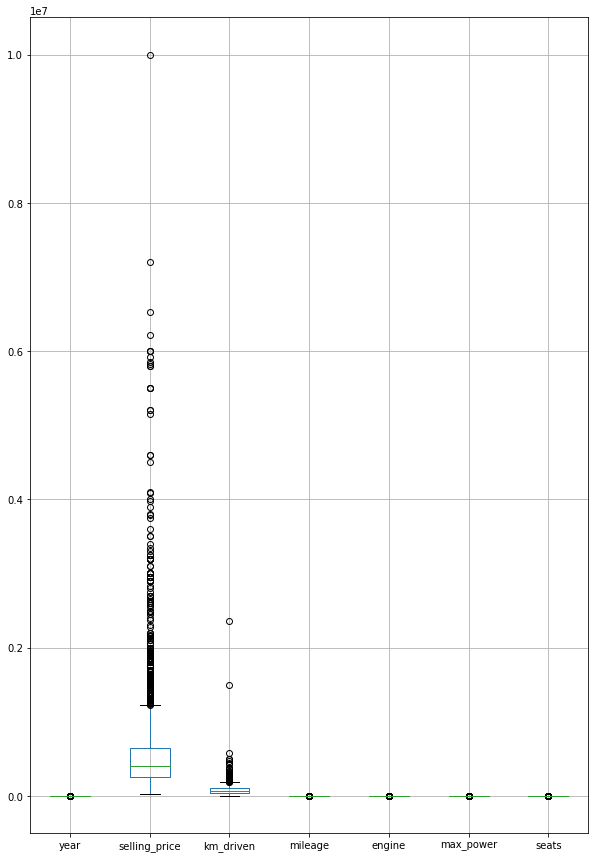

In [84]:
df_train.boxplot(figsize=(10, 15))

### Кодирование признаков

Посмотрим на среднюю стоимость автомобиля в зависимости от вида топлива:

In [85]:
for fuel in list(df_train['fuel'].unique()):
    print(fuel, df_train[df_train['fuel'] == fuel]['selling_price'].mean())

Diesel 645377.8105130626
Petrol 380894.7774331136
LPG 198411.76470588235
CNG 292959.94


In [86]:
for fuel in list(df_train['fuel'].unique()):
    print(fuel, df_train[df_train['fuel'] == fuel]['fuel'].count())

Diesel 3177
Petrol 2579
LPG 34
CNG 50


Известный факт, что дизельное топливо дороже всех остальных, и чаще используется в более мощных автомобилях, которые дороже, а газ самый дешевый. Попробуем далее закодировать этот признак с помощью CatBoostEncoder (кодирование в зависимости от значения таргета)

Посмотрим на среднюю стоимость автомобиля в зависимости от количества владельцев:

In [87]:
for owner in list(df_train['owner'].unique()):
    print(owner, df_train[df_train['owner'] == owner]['selling_price'].mean())

First Owner 620520.811545934
Second Owner 388130.13483831607
Third Owner 286973.92731277534
Fourth & Above Owner 223214.24285714285
Test Drive Car 5167250.0


In [88]:
for owner in list(df_train['owner'].unique()):
    print(owner, df_train[df_train['owner'] == owner]['owner'].count())

First Owner 3603
Second Owner 1639
Third Owner 454
Fourth & Above Owner 140
Test Drive Car 4


Хорошо видно, что чем меньше владельцев было у автомобиля, тем он дороже. Попробуем также далее закодировать этот признак с помощью CatBoostEncoder

Посмотрим на среднюю стоимость автомобиля в зависимости от типа продавца:

In [89]:
for seller_type in list(df_train['seller_type'].unique()):
    print(seller_type, df_train[df_train['seller_type'] == seller_type]['selling_price'].mean())

Individual 474801.44801838027
Dealer 938657.0422297297
Trustmark Dealer 740560.0


In [90]:
for seller_type in list(df_train['seller_type'].unique()):
    print(seller_type, df_train[df_train['seller_type'] == seller_type]['seller_type'].count())

Individual 5223
Dealer 592
Trustmark Dealer 25


Посмотрим на связь между типом продавца и количеством владельцев автомобиля:

In [91]:
for seller_type in list(df_train['seller_type'].unique()):
    print(seller_type, df_train[df_train['seller_type'] == seller_type]['owner'].value_counts())

Individual First Owner             3074
Second Owner            1558
Third Owner              451
Fourth & Above Owner     140
Name: owner, dtype: int64
Dealer First Owner       507
Second Owner       78
Test Drive Car      4
Third Owner         3
Name: owner, dtype: int64
Trustmark Dealer First Owner     22
Second Owner     3
Name: owner, dtype: int64


Посмотрим на связь между типом продавца и пробегом автомобиля:

In [92]:
for seller_type in list(df_train['seller_type'].unique()):
    print(seller_type, df_train[df_train['seller_type'] == seller_type]['km_driven'].mean())

Individual 76629.89373923033
Dealer 52001.78885135135
Trustmark Dealer 34324.08


Видим, что у продавцов типа dealer и trustmark_dealer машины в целом имели меньше владельцев и меньший пробег. Попробуем также далее закодировать этот признак с помощью CatBoostEncoder

Посмотрим на среднюю цену автомобиля в зависимости от коробки передач:

In [93]:
for transmission in list(df_train['transmission'].unique()):
    print(transmission, df_train[df_train['transmission'] == transmission]['selling_price'].mean())

Manual 445797.02867316344
Automatic 1339908.7043650793


In [94]:
for transmission in list(df_train['transmission'].unique()):
    print(transmission, df_train[df_train['transmission'] == transmission]['transmission'].count())

Manual 5336
Automatic 504


In [95]:
for transmission in list(df_train['transmission'].unique()):
    print(transmission, int(df_train[df_train['transmission'] == transmission]['year'].mean()))

Manual 2013
Automatic 2015


Видим, что автомобили на «автомате» сильно дороже автомобилей на «механике». Попробуем также закодировать далее этот признак с помощью CatBoostEncoder

Напоследок посмотрим на среднюю цену автомобиля в зависимости от количества сидений:

In [96]:
for seats in list(df_train['seats'].unique()):
    print(seats, df_train[df_train['seats'] == seats]['selling_price'].mean())

5 473616.47249891725
4 481171.2978723404
7 802812.47
8 582727.7068062827
6 550604.1666666666
9 502382.2794117647
10 328777.6111111111
14 235000.0
2 700500.0


Не понятно, но очень интересно, пожалуй закодируем этот признак One-Hot Encoderом

### Пайплайн для кодирования признаков и скейлинга данных

In [97]:
X_train = df_train.drop(columns=['selling_price', 'name'])
y_train = df_train['selling_price']

X_test = df_test.drop(columns=['selling_price', 'name'])
y_test = df_test['selling_price']

In [98]:
X_train

,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,5
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,5
2,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,5
3,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,5
4,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,5
...,...,...,...,...,...,...,...,...,...,...
6992,2008,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,5
6993,2013,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,5
6994,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,5
6995,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,5


In [99]:
from category_encoders.cat_boost import CatBoostEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

cbe_columns: list[str] = ['fuel', 'owner', 'seller_type', 'transmission']
ohe_columns: list[str] = ['seats']
real_columns: list[str] = ['year', 'km_driven', 'mileage', 'engine', 'max_power']

transformer: ColumnTransformer = ColumnTransformer(
    [
        (
            'cbe', 
            CatBoostEncoder(),
            cbe_columns
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', sparse_output=False), 
            ohe_columns
        ),
        ('scaler', StandardScaler(), real_columns),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
).set_output(transform='pandas')
    
extra_scaler: ColumnTransformer = ColumnTransformer(
    [
        ('scaler', StandardScaler(), cbe_columns),
    ],
    remainder='passthrough',
    verbose_feature_names_out=False
).set_output(transform='pandas')
    
preprocessing_pipeline: Pipeline = Pipeline([
    ('transformer', transformer),
    ('extra_scaler', extra_scaler)
])

In [100]:
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train, y_train)
X_test_preprocessed = preprocessing_pipeline.transform(X_test)

In [101]:
X_train_preprocessed

,fuel,owner,seller_type,transmission,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14,year,km_driven,mileage,engine,max_power
0,-0.233226,-0.150295,-0.090463,-0.051585,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.139570,1.191152,0.911289,-0.373643,-0.439550
1,-0.462867,-0.150295,-0.290111,-0.167768,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.139570,0.766619,0.376748,0.141162,0.493513
2,-0.707279,-0.346165,-0.502601,-0.291424,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.837167,0.883158,0.816680,-0.068879,0.066175
3,-0.233226,-0.814147,-0.807236,-0.468702,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.569719,0.766619,-0.815325,-0.270682,0.009281
4,-1.470061,-1.175657,-1.094000,-0.635581,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.872122,-0.482007,0.140226,-0.478663,-0.191113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6992,-1.126094,0.374936,-0.352762,-0.296686,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.325535,1.948653,-0.384854,-0.707236,-0.815684
6993,-1.126732,-0.873366,-0.353134,-0.296880,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.104614,-0.398765,-0.153062,-0.888447,-0.657645
6994,-1.127027,0.374189,-0.353359,-0.296991,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.104614,0.600136,-0.247671,-0.478663,-0.159821
6995,0.538681,-1.744820,-0.353522,-0.297067,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.569719,0.749971,-0.649759,0.130865,0.698332


In [102]:
X_test_preprocessed

,fuel,owner,seller_type,transmission,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14,year,km_driven,mileage,engine,max_power
0,0.537147,0.373386,-0.353975,-0.297290,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,-0.837167,1.565740,-1.312022,2.200379,0.761548
1,0.537147,0.373386,-0.353975,-0.297290,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.872122,-0.814974,0.461896,0.139102,0.650920
2,-1.127176,0.373386,-0.353975,2.545105,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.569719,2.405866,-1.572197,0.760986,1.330489
3,0.537147,0.373386,-0.353975,-0.297290,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.383754,1.648982,1.313377,0.141162,0.338003
4,-1.127176,-0.873787,-0.353975,-0.297290,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.592983,-0.065798,-0.720716,-0.530144,-0.724021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.127176,-0.873787,-0.353975,-0.297290,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.325535,0.433652,0.062173,-0.707236,-0.627617
996,-1.127176,-0.873787,-0.353975,-0.297290,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.872122,-0.398765,-0.224019,-0.478663,-0.192061
997,0.537147,0.373386,-0.353975,-0.297290,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.081351,-0.565249,0.816680,-0.068879,0.066175
998,-1.127176,0.373386,-0.353975,-0.297290,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.348799,-0.814974,0.192261,-0.478663,-0.284672


Посмотрим на модель

In [103]:
grid_search: GridSearchCV = GridSearchCV(
    estimator=Ridge(max_iter=int(1e4)), 
    param_grid={
        'alpha': np.arange(1e-2, 1e2, 1e-1)
    }, 
    cv=10, 
    scoring='r2', 
    verbose=1, 
    n_jobs=8
)

In [104]:
grid_search.fit(X_train_preprocessed, y_train)

Fitting 10 folds for each of 1000 candidates, totalling 10000 fits


GridSearchCV(cv=10, estimator=Ridge(max_iter=10000), n_jobs=8,
             param_grid={'alpha': array([1.000e-02, 1.100e-01, 2.100e-01, 3.100e-01, 4.100e-01, 5.100e-01,
       6.100e-01, 7.100e-01, 8.100e-01, 9.100e-01, 1.010e+00, 1.110e+00,
       1.210e+00, 1.310e+00, 1.410e+00, 1.510e+00, 1.610e+00, 1.710e+00,
       1.810e+00, 1.910e+00, 2.010e+00, 2.110e+00, 2.210e+00, 2.310e+00,
       2.410e+00, 2.510e+00, 2.6...
       9.661e+01, 9.671e+01, 9.681e+01, 9.691e+01, 9.701e+01, 9.711e+01,
       9.721e+01, 9.731e+01, 9.741e+01, 9.751e+01, 9.761e+01, 9.771e+01,
       9.781e+01, 9.791e+01, 9.801e+01, 9.811e+01, 9.821e+01, 9.831e+01,
       9.841e+01, 9.851e+01, 9.861e+01, 9.871e+01, 9.881e+01, 9.891e+01,
       9.901e+01, 9.911e+01, 9.921e+01, 9.931e+01, 9.941e+01, 9.951e+01,
       9.961e+01, 9.971e+01, 9.981e+01, 9.991e+01])},
             scoring='r2', verbose=1)

In [105]:
grid_search.best_estimator_

Ridge(alpha=8.81, max_iter=10000)

In [106]:
model = grid_search.best_estimator_.fit(X_train_preprocessed, y_train)

print('Train')
print(r2_score(y_train, model.predict(X_train_preprocessed)))
print(MSE(y_train, model.predict(X_train_preprocessed)))

print('Test')
print(r2_score(y_test, model.predict(X_test_preprocessed)))
print(MSE(y_test, model.predict(X_test_preprocessed)))

Train
0.6470624836179146
101165423239.92033
Test
0.6270028632348373
214409405383.99374


Что ж, лучше явно не стало

### Попробуем добавить полиномиальные фичи

In [107]:
from sklearn.preprocessing import PolynomialFeatures

preprocessing_pipeline: Pipeline = Pipeline([
    ('transformer', transformer),
    ('extra_scaler', extra_scaler),
    ('polynomial_features', PolynomialFeatures(2))
])

In [108]:
X_train_preprocessed = preprocessing_pipeline.fit_transform(X_train, y_train)
X_train_preprocessed

array([[ 1.        , -0.23322588, -0.15029493, ...,  0.13960908,
         0.16423496,  0.19320464],
       [ 1.        , -0.46286657, -0.15029493, ...,  0.01992657,
         0.06966508,  0.24355535],
       [ 1.        , -0.70727926, -0.34616467, ...,  0.00474428,
        -0.00455806,  0.00437915],
       ...,
       [ 1.        , -1.12702697,  0.37418906, ...,  0.22911836,
         0.07650042,  0.02554276],
       [ 1.        ,  0.53868062, -1.74482032, ...,  0.01712576,
         0.09138753,  0.48766778],
       [ 1.        ,  0.53766894,  0.37374104, ...,  0.13960908,
         0.16541596,  0.19599328]])

In [109]:
model = Ridge(alpha=8.81, max_iter=10000).fit(X_train_preprocessed, y_train)
print(r2_score(y_train, model.predict(X_train_preprocessed)))
print(MSE(y_train, model.predict(X_train_preprocessed)))

0.8584754477850852
40566362483.72712


Стало лучше! Итого:

In [110]:
model: Ridge = Ridge(alpha=8.81, max_iter=10000)

In [111]:
X_train = preprocessing_pipeline.fit_transform(X_train, y_train)
model = model.fit(X_train, y_train)
print(r2_score(y_train, model.predict(X_train)))
print(MSE(y_train, model.predict(X_train)))

0.8584754477850852
40566362483.72712


Проделаем тоже самое с тестовой выборкой:

In [112]:
X_test = preprocessing_pipeline.transform(X_test)
print(r2_score(y_test, model.predict(X_test)))
print(MSE(y_test, model.predict(X_test)))

0.8473638652284115
87739608888.98715


Looks great!

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [113]:
from sklearn.metrics import mean_absolute_percentage_error as mape

def business_metrics(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    N = len(y_true)
    return np.average([mape([y_true[i]], [y_pred[i]]) <= 0.1 for i in range(N)])

business_metrics(model.predict(X_train), y_train)

0.2773972602739726

In [114]:
business_metrics(model.predict(X_test), y_test)

0.294

### Пиклим модель

In [115]:
import pickle

pickle.dump(model, open('best_model.pickle', 'wb'))

Проверяем, что все работает

In [116]:
loaded_model = pickle.load(open('best_model.pickle', 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.8473638652284115


# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [117]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str 
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link